In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys

In [2]:
image = cv2.imread("Images/people.jpg")
type(image),image.shape

(numpy.ndarray, (294, 626, 3))

In [3]:
detector = cv2.CascadeClassifier("cascade/fullbody.xml")

gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
type(gray_img),gray_img.shape

(numpy.ndarray, (294, 626))

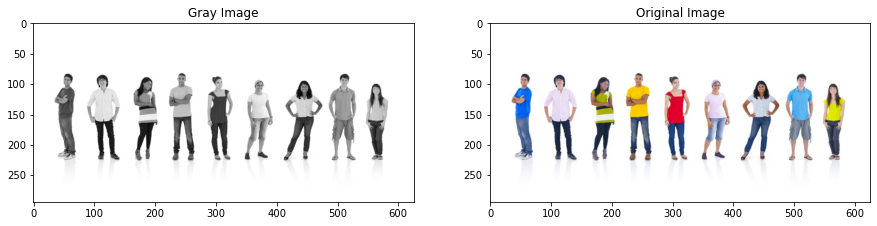

In [4]:
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.imshow(gray_img, cmap = "gray")
plt.title("Gray Image")

plt.subplot(122)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.show()

In [5]:
detections = detector.detectMultiScale(gray_img)
len(detections),detections.shape

(9, (9, 4))

In [6]:
for (x,y,w,h) in detections:
    
    cv2.rectangle(image, (x,y), (x+w,y+h),(0,255,0),2)

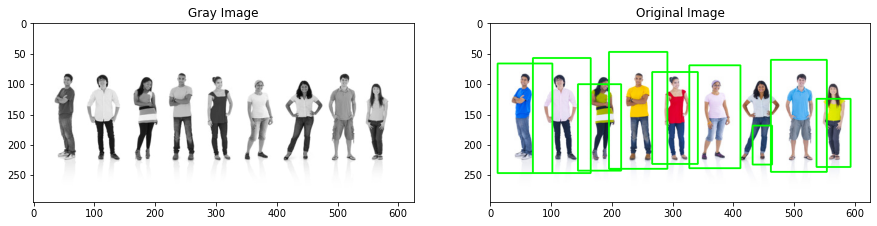

In [7]:
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.imshow(gray_img, cmap = "gray")
plt.title("Gray Image")

plt.subplot(122)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.show()

## 

In [ ]:
import cv2
import numpy as np
import os
import sys
from numpy.random import randint

tracker = cv2.legacy.TrackerCSRT_create()

cap = cv2.VideoCapture("Videos/walking.avi")

if not cap.isOpened():
    print("Error While Loading The Video !")
    sys.exit()
    
conn,frame = cap.read()

if not conn:    
    print("Error While Loading The Frame !")
    sys.exit()

cascade_detector = cv2.CascadeClassifier("cascade/fullbody.xml")

def detect():
    
    while True:
        
        conn, frame = cap.read()
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        detections = cascade_detector.detectMultiScale(frame_gray,minSize = (60,60))
        
        for (x,y,w,h) in detections:
            
            cv2.rectangle(frame, (x,y), (x+w,y+h),(0,255,0),2)
            cv2.imshow("Detection", frame)
            #cv2.waitKey(0)
            #cv2.destroyAllWindows()
            
            if x > 0:
                print("Haarcade Detection")
                return x,y,w,h
            
# Press Space !!
#bbox = detect()
bbox = cv2.selectROI(frame)

print(bbox)

tracker.init(frame,bbox)
colors = ( randint(0,255), randint(0,255), randint(0,255))

while True:
    
    conn, frame = cap.read()
    
    if not conn:
        break
        
    ok, bbox = tracker.update(frame)
    
    if ok :
        
        (x,y,w,h) = [int(v) for v in bbox]
        cv2.rectangle(frame,(x,y),(x+w,y+h),colors,2)
        
    else:
        
        print("Tracking Failure ! We will execute the haarcascade detector")
        bbox = detect()
        tracker = cv2.legacy.TrackerMOSSE_create()
        tracker.init(frame,bbox)
        
    cv2.imshow("Tracking",frame)
    k = cv2.waitKey(1) & 0xFF 
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()

(171, 72, 49, 51)
